In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import astropy as ay
import astropy.units as ay_u
import astropy.coordinates as ay_coord

import magnetic_field_functions_2d as mff2d
import magnetic_field_functions_3d as mff3d
import model_observing as m_obs

%load_ext line_profiler
# %matplotlib notebook


In [7]:
def mag_field(x,y,z):
    h = 0.3257
    k_array = [0.9549,0.4608,0.6320]
    disk_radius = 3.8918
    uniform_B0 = 3.3118    
    return mff3d.hourglass_magnetic_field_cart_3d(x, y, z,
                                                  h, k_array, disk_radius, uniform_B0,
                                                  center=[0, 0, 0])

def cloud_eq(x,y,z):
    radius = 1
    return x**2 + y**2 + z**2 - radius

def test_field(x,y,z):
    return 0,1,0

center_coord = ay_coord.SkyCoord('00h00m00.00s','00d00m00.00s',frame='icrs')

n_zeros = 30

target_object = m_obs.ProtostarModel(center_coord,cloud_eq,test_field,ra_wrap_angle=np.pi)
target_sightline = m_obs.Sightline(None,None,Skycord_object=center_coord,ra_wrap_angle=np.pi)


telescope_data = m_obs.ObservingRun(target_object,target_sightline,3)
_ = telescope_data.Stokes_parameter_contours(n_samples=100) # Res is n_samples

## Multiple Plots

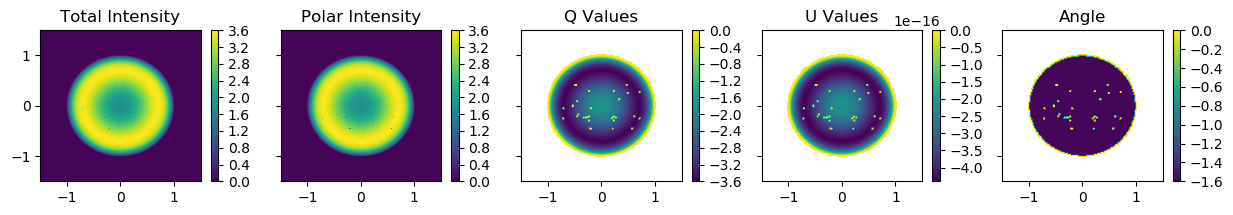

In [8]:
def test_field_0(x,y,z):
    return 0,1,0

def intensity_field_0(x,y,z):
    return 2*x**2 + 2*y**2 + 2*z**2

target_object_0 = m_obs.ProtostarModel(center_coord,cloud_eq,test_field_0,density_model=intensity_field_0,
                                       zeros_guess_count=n_zeros,ra_wrap_angle=np.pi)
target_sightline_0 = m_obs.Sightline(None,None,Skycord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_0 = m_obs.ObservingRun(target_object_0,target_sightline_0,3)

_ = telescope_data_0.Stokes_parameter_contours(n_axial_samples=150)

In [ ]:
a,b = _
print(min(b[2]))

In [ ]:
def test_field_45(x,y,z):
    return 0,1,1

def intensity_field_45(x,y,z):
    return 2*x**2 + 2*y**2 + 2*z**2

def polar_model(x,y,z):
    return 0.5

target_object_45 = m_obs.ProtostarModel(center_coord,cloud_eq,test_field_45,density_model=intensity_field_45,
                                        zeros_guess_count=n_zeros,polarization_model=polar_model,ra_wrap_angle=np.pi)
target_sightline_45 = m_obs.Sightline(None,None,Skycord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_45 = m_obs.ObservingRun(target_object_45,target_sightline_45,3)

_ = telescope_data_45.Stokes_parameter_contours(n_axial_samples=50)

In [ ]:
def test_field_90(x,y,z):
    return 0,0,1

def cloud_eq_x(x,y,z):
    R = 1
    r = 0.5
    return (np.sqrt(y**2 + z**2) - R)**2 + x**2 - r**2

target_object_90 = m_obs.ProtostarModel(center_coord,cloud_eq_x,test_field_90,
                                        zeros_guess_count=n_zeros,ra_wrap_angle=np.pi)
target_sightline_90 = m_obs.Sightline(None,None,Skycord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_90 = m_obs.ObservingRun(target_object_90,target_sightline_90,3)

_ = telescope_data_90.Stokes_parameter_contours(n_axial_samples=50)

In [ ]:
def test_field_135(x,y,z):
    return 0,-1,1

def cloud_eq_y(x,y,z):
    R = 1
    r = 0.5
    return (np.sqrt(x**2 + z**2) - R)**2 + y**2 - r**2

target_object_135 = m_obs.ProtostarModel(center_coord,cloud_eq_y,test_field_135,
                                         zeros_guess_count=n_zeros,ra_wrap_angle=np.pi)
target_sightline_135 = m_obs.Sightline(None,None,Skycord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_135 = m_obs.ObservingRun(target_object_135,target_sightline_135,3)

_ = telescope_data_135.Stokes_parameter_contours(n_axial_samples=50)

In [ ]:
def test_field_180(x,y,z):
    return 0,-1,0

def cloud_eq_z(x,y,z):
    R = 1
    r = 0.5
    return (np.sqrt(x**2 + y**2) - R)**2 + z**2 - r**2

target_object_180 = m_obs.ProtostarModel(center_coord,cloud_eq_z,test_field_180,
                                         zeros_guess_count=n_zeros,ra_wrap_angle=np.pi)
target_sightline_180 = m_obs.Sightline(None,None,Skycord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_180 = m_obs.ObservingRun(target_object_180,target_sightline_180,3)

_ = telescope_data_180.Stokes_parameter_contours(n_axial_samples=50)

## Big Braking!

In [ ]:
# %lprun -f telescope_data.Stokes_parameter_contours telescope_data.Stokes_parameter_contours(n_samples=10000)
#axes,stokes = telescope_data.Stokes_parameter_contours(n_samples=10000)

In [ ]:
# Speckle testing
#axes,stokes = telescope_data.Stokes_parameter_contours(n_samples=10000)

## Testing!

In [ ]:
test_coord = ay_coord.SkyCoord('12h00m01.00s','00d00m00.00s',frame='icrs')
print(test_coord.ra,test_coord.dec)
print(test_coord.ra.wrap_angle)
test_coord.ra.wrap_angle = ay_u.rad * np.pi
print(test_coord.ra,test_coord.dec)
print(test_coord.ra.wrap_angle)


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(axes[0],axes[1],stokes[0],'.',s=1)